In [151]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc, MetaData, Table , distinct
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sqlalchemy import *


In [152]:
#select trip dates, specifically because my birthday is in this range
trip_start_date = '2018-02-05'                                               
trip_end_date = '2018-02-20'

In [153]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [154]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [155]:
# Collect the names of tables within the database
inspector.get_table_names()

['clean_hawaii_measurements', 'clean_hawaii_stations']

In [156]:
meta = MetaData()
meas_table = Table('clean_hawaii_measurements', meta)
stats_table = Table('clean_hawaii_stations', meta)
insp = inspector.from_engine(engine)
insp.reflecttable(meas_table, None)
insp.reflecttable(stats_table, None)


In [157]:
columns = inspector.get_columns('clean_hawaii_measurements')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [158]:
columns = inspector.get_columns('clean_hawaii_stations')
for column in columns:
    print(column)

{'name': 'station_id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [159]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [160]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [161]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['clean_hawaii_measurements', 'clean_hawaii_stations']

In [162]:
conn = engine.connect()                                                     
inspector = inspect(engine)      

In [163]:
# Assign the hawaii_measurement class to a variable called `Measurement`
Measurement = Base.classes.clean_hawaii_measurements

In [164]:
# Assign the hawaii_station class to a variable called `Station`
Station = Base.classes.clean_hawaii_stations

In [165]:
# Create a session
session = Session(engine)

In [166]:

# queries the database for previous years precipitation data.
prcp_anyl = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <='2017-08-23').filter(Measurement.date >='2016-08-24').all()

In [167]:
prcp_df = pd.DataFrame(prcp_anyl)

In [168]:
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

In [290]:
prcp_date = prcp_df.set_index('date')
prcp_date.to_dict()['prcp']

{Timestamp('2016-08-24 00:00:00'): 1.45,
 Timestamp('2016-08-25 00:00:00'): 0.11,
 Timestamp('2016-08-26 00:00:00'): 0.01,
 Timestamp('2016-08-27 00:00:00'): 0.12,
 Timestamp('2016-08-28 00:00:00'): 2.0699999999999998,
 Timestamp('2016-08-29 00:00:00'): 0.90000000000000002,
 Timestamp('2016-08-30 00:00:00'): 0.050000000000000003,
 Timestamp('2016-08-31 00:00:00'): 2.46,
 Timestamp('2016-09-01 00:00:00'): 0.01,
 Timestamp('2016-09-02 00:00:00'): 0.029999999999999999,
 Timestamp('2016-09-03 00:00:00'): 1.0,
 Timestamp('2016-09-04 00:00:00'): 0.44,
 Timestamp('2016-09-05 00:00:00'): 0.17999999999999999,
 Timestamp('2016-09-06 00:00:00'): 1.0,
 Timestamp('2016-09-07 00:00:00'): 1.3500000000000001,
 Timestamp('2016-09-08 00:00:00'): 0.14999999999999999,
 Timestamp('2016-09-09 00:00:00'): 0.34999999999999998,
 Timestamp('2016-09-10 00:00:00'): 1.1599999999999999,
 Timestamp('2016-09-11 00:00:00'): 0.59999999999999998,
 Timestamp('2016-09-12 00:00:00'): 1.04,
 Timestamp('2016-09-13 00:00:00')

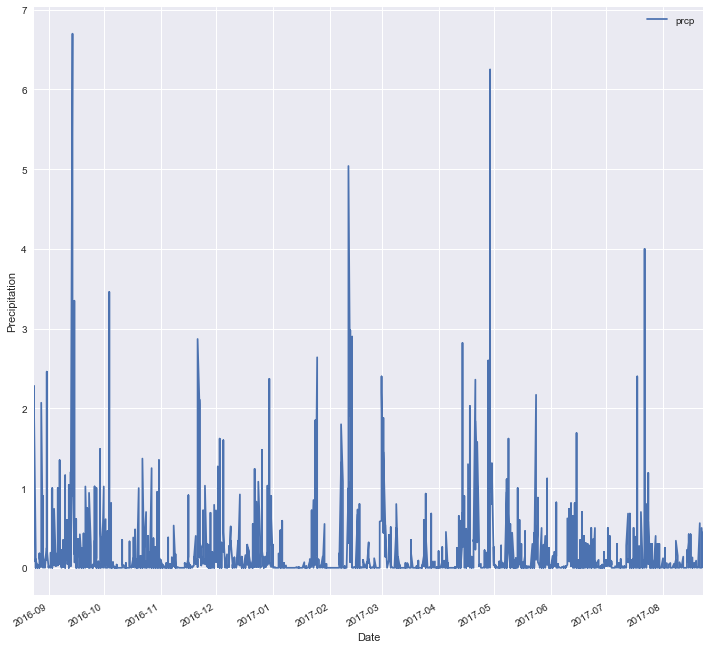

In [170]:
sns.set()
prcp_plot = prcp_date.plot(kind='line',sort_columns = True,use_index = True, figsize=(12,12))
prcp_plot.set_xlabel("Date")
prcp_plot.set_ylabel("Precipitation")


plt.show()

In [171]:
prcp_date.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [172]:
 #Design a query to calculate the total number of stations.

station_num = session.query(Station.station_id).count()
print(station_num)

9


In [295]:
type(stats_table)

sqlalchemy.sql.schema.Table

In [174]:
#Design a query to find the most active stations.
j = meas_table.join(stats_table,
                meas_table.c.station == stats_table.c.station)
k = select([meas_table]).select_from(j).group_by(meas_table.c.station).order_by()

stmt = session.query(k)
for row in stmt:
    print(row)

(15619, 'USC00511918', '2015-10-30', 0.0, 64)
(5381, 'USC00513117', '2017-07-31', 0.0, 77)
(7318, 'USC00514830', '2017-08-23', 0.0, 82)
(18103, 'USC00516128', '2017-08-23', 0.45, 76)
(8001, 'USC00517948', '2017-07-28', 0.01, 80)
(8343, 'USC00518838', '2015-10-20', 0.0, 74)
(13687, 'USC00519281', '2017-08-18', 0.06, 79)
(2685, 'USC00519397', '2017-08-23', 0.0, 81)
(10915, 'USC00519523', '2017-08-23', 0.08, 82)


In [296]:
stmt = session.execute("SELECT clean_hawaii_stations.name, COUNT(clean_hawaii_measurements.station) AS total_measurements FROM \
clean_hawaii_measurements INNER JOIN clean_hawaii_stations ON clean_hawaii_measurements.station = clean_hawaii_stations.station \
GROUP BY clean_hawaii_measurements.station ORDER BY total_measurements DESC")

tobs_df = pd.DataFrame(stmt.fetchall())
tobs_df.columns = stmt.keys()
tobs_df

,name,total_measurements
0,"WAIHEE 837.5, HI US",2772
1,"KANEOHE 838.1, HI US",2696
2,"WAIKIKI 717.2, HI US",2685
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,"MANOA LYON ARBO 785.2, HI US",2484
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,"PEARL CITY, HI US",683
8,"UPPER WAHIAWA 874.3, HI US",342


In [189]:
#Find the station with the highest total number of observations
max_station = tobs_df.loc[0,:]
max_station

name                  WAIHEE 837.5, HI US
total_measurements                   2772
Name: 0, dtype: object

In [203]:
stat_date = session.execute("SELECT clean_hawaii_stations.name,COUNT(clean_hawaii_measurements.station) AS total_measurements FROM clean_hawaii_measurements INNER JOIN clean_hawaii_stations ON clean_hawaii_measurements.station = clean_hawaii_stations.station WHERE clean_hawaii_measurements.date >= '2016-08-24' and clean_hawaii_measurements.date <= '2017-08-23' GROUP BY clean_hawaii_stations.name ORDER BY total_measurements DESC")

tobs_date_df = pd.DataFrame(stat_date.fetchall())
tobs_date_df.columns = stat_date.keys()
tobs_date_df

,name,total_measurements
0,"WAIKIKI 717.2, HI US",358
1,"WAIHEE 837.5, HI US",351
2,"KANEOHE 838.1, HI US",342
3,"MANOA LYON ARBO 785.2, HI US",327
4,"WAIMANALO EXPERIMENTAL FARM, HI US",313
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",264
6,"PEARL CITY, HI US",60


In [285]:
#start_date = '2017-02-05'
#end_date = '2017-02-15'
def calc_temps (start_date, end_date):
    stat_meas = session.execute("SELECT clean_hawaii_stations.name,clean_hawaii_measurements.date,clean_hawaii_measurements.tobs FROM \
    clean_hawaii_measurements INNER JOIN clean_hawaii_stations ON clean_hawaii_measurements.station = clean_hawaii_stations.station WHERE clean_hawaii_measurements.date >= '" + start_date + "' and clean_hawaii_measurements.date <= '" + end_date + "'")

    stat_tobs_df = pd.DataFrame(stat_meas.fetchall())
    stat_tobs_df.columns = stat_meas.keys()
    desc_stat_df = stat_tobs_df.describe().reset_index()
    prt_stat_df = desc_stat_df.pivot(columns = 'index', values = 'tobs').fillna(0)
    mean = prt_stat_df['mean'].sum()
    prt_mean = format(mean, '.2f')
    min_temp = prt_stat_df['min'].sum()
    max_temp = prt_stat_df['max'].sum()
    print(prt_stat_df)
    print("Average temperature during " + start_date + " to " + end_date + " was " + str(prt_mean) + ", \n" 
          "with a minimum temperature of " + str(min_temp) + ", \n" 
          "and a maximum temperature of " + str(max_temp) + ".")
    return prt_stat_df
                                
prt_stat_df = calc_temps('2017-02-05','2017-02-15')                        

index    25%   50%   75%  count   max       mean   min       std
0       0.00   0.0   0.0   68.0   0.0   0.000000   0.0  0.000000
1       0.00   0.0   0.0    0.0   0.0  70.279412   0.0  0.000000
2       0.00   0.0   0.0    0.0   0.0   0.000000   0.0  5.435773
3       0.00   0.0   0.0    0.0   0.0   0.000000  59.0  0.000000
4      66.75   0.0   0.0    0.0   0.0   0.000000   0.0  0.000000
5       0.00  70.5   0.0    0.0   0.0   0.000000   0.0  0.000000
6       0.00   0.0  75.0    0.0   0.0   0.000000   0.0  0.000000
7       0.00   0.0   0.0    0.0  80.0   0.000000   0.0  0.000000
Average temperature during 2017-02-05 to 2017-02-15 was 70.28, 
with a minimum temperature of 59.0, 
and a maximum temperature of 80.0.


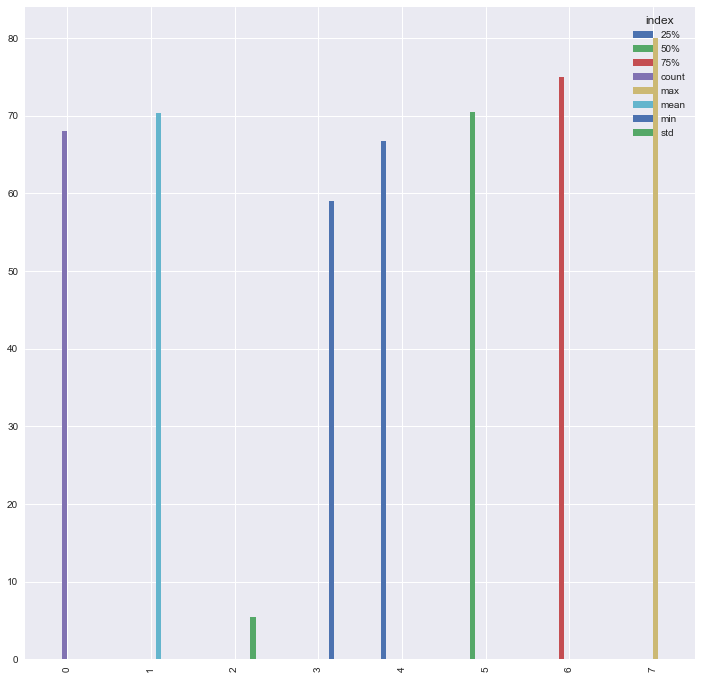

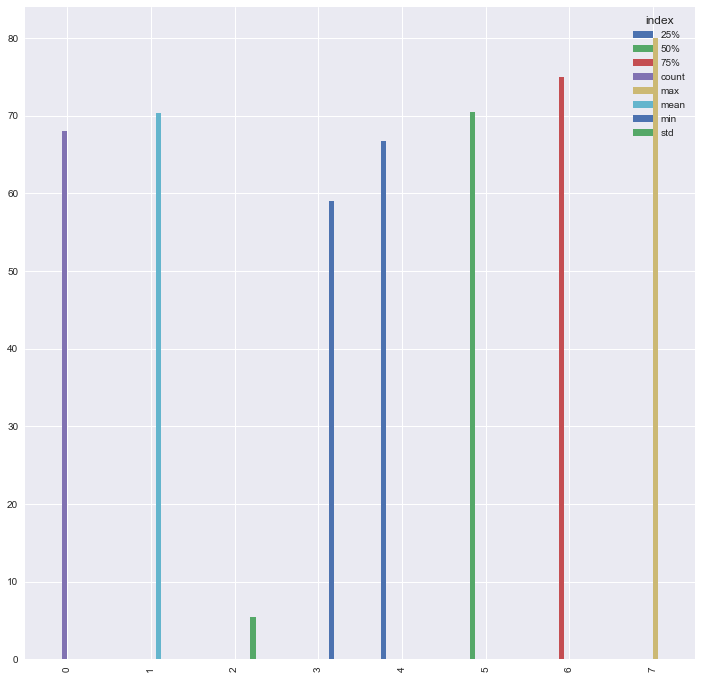

In [278]:
stat_plot = prt_stat_df.plot(kind='bar',sort_columns = True,use_index = True, figsize=(12,12))
plt.show()

In [226]:
desc_stat_df


,index,tobs
0,count,2015.000000
1,mean,74.484367
2,std,4.629750
3,min,58.000000
4,25%,71.000000
5,50%,75.000000
6,75%,78.000000
7,max,87.000000


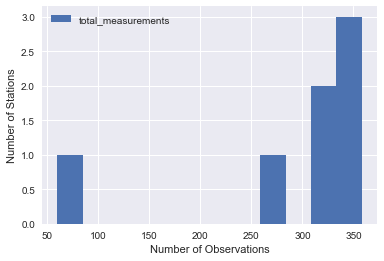

In [205]:

tos_hist = tobs_date_df.plot.hist(bins=12)
tos_hist.set_xlabel("Number of Observations")
tos_hist.set_ylabel("Number of Stations")


plt.show()
